In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!pip install docx2txt # Install the docx2txt module

  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3960 sha256=f62d7339e623341658bb67d77ba3f81191c42e5d24d2dd46ea582d4b39cb13cd
  Stored in directory: /root/.cache/pip/wheels/22/58/cf/093d0a6c3ecfdfc5f6ddd5524043b88e59a9a199cb02352966
Successfully built docx2txt


In [8]:
import spacy
import docx2txt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [13]:
import os # Import the os module

# Update file_path to the local path within your Google Drive mount point
file_path   = r'/content/drive/MyDrive/RESUME_CLASSIFICATION' # Replace 'Your_Folder_Name' with the actual folder name
doc_file    = []
pdf_file    = []
docx_file   = []
folder_name = []

for folder in os.listdir(file_path):
    folder_path = os.path.join(file_path, folder) # Use os.path.join for platform-independent path construction
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.docx'):
            docx_file.append(file)
            folder_name.append(folder)
        else:
            pdf_file.append(file)
            folder_name.append(folder)

In [14]:
print('Number of .doc Files  = {}'.format(len(doc_file)),'\n'
      'Number of .pdf Files  = {}'.format(len(pdf_file)),'\n'
      'Number of .docx Files = {}'.format(len(docx_file)))

Number of .doc Files  = 3 
Number of .pdf Files  = 4 
Number of .docx Files = 20


In [15]:
print("Total Number of Files = ", len(docx_file)+len(doc_file)+len(pdf_file))

Total Number of Files =  27


In [16]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

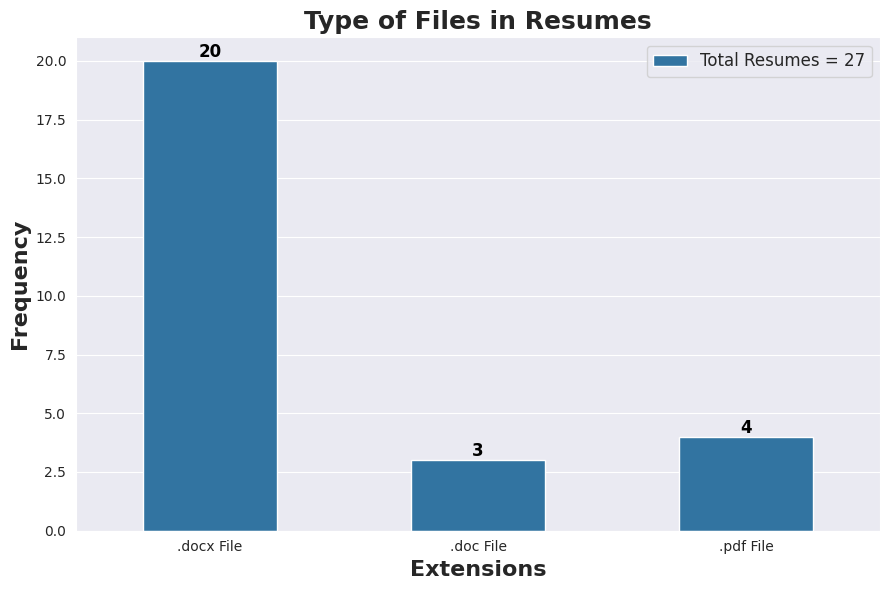

In [17]:
fig, axe = plt.subplots(1,1, figsize=(9,6), dpi=100)
ax = sns.barplot(x=['.docx File','.doc File','.pdf File'], y= [len(docx_file),len(doc_file),len(pdf_file)], width=0.5,
                 ax = axe, label= 'Total Resumes = {}'.format(len(docx_file)+len(doc_file)+len(pdf_file)))

axe.set_xlabel('Extensions', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.legend(loc='best', fontsize= 'large')
plt.title('Type of Files in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG\File_Type_Bar', dpi = 500)

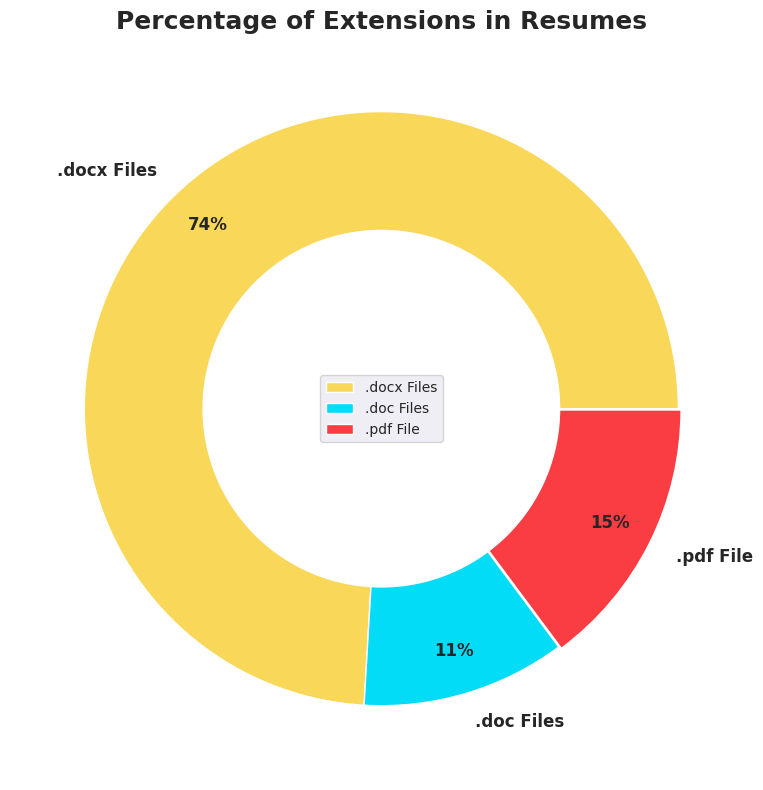

In [18]:
fig = plt.figure(figsize=(8,8), dpi = 100)

sizes = [len(docx_file),len(doc_file),len(pdf_file)]
labels = ['.docx Files','.doc Files','.pdf File']
colors = ['#F9D759', '#03DCF6', '#F93D43']
explode = (0.00, 0.00, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance= 0.85,
        explode= explode, startangle= 0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='w')
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Extensions in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc= "center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG\Per_File_Pai', dpi = 500)

In [34]:
import os

file_path = r'/content/drive/MyDrive/RESUME_CLASSIFICATION/Resumes'
file_name = []
profile   = []

for item in os.listdir(file_path):
    item_path = os.path.join(file_path, item)

    # Check if the item is a directory
    if os.path.isdir(item_path):
        for file in os.listdir(item_path):
            if file.endswith('.doc'):
                profile.append(item)  # Append the folder name
                file_name.append(file)
            elif file.endswith('.docx'):
                profile.append(item)  # Append the folder name
                file_name.append(file)
            else:
                profile.append(item)  # Append the folder name
                file_name.append(file)
    else:
        # If it's a file, handle it directly (if needed)
        if item.endswith('.doc') or item.endswith('.docx') or item.endswith('.pdf'):
            profile.append(os.path.basename(file_path))  # Append the parent folder name
            file_name.append(item)

In [35]:
resume_data = pd.DataFrame()
resume_data['Profile'] = profile
resume_data['Resumes'] = file_name
resume_data

,Profile,Resumes
0,Resumes,React JS Developer_AnjaniPriyadarshini.doc
1,Resumes,Internship_Susovan Bag_Musquare Technologies.docx
2,Resumes,React Developer_Naveen sadhu.docx
3,Resumes,React Developer_PavasGoswami.doc
4,Resumes,React Developer_Haripriya.docx
...,...,...
74,SQL Developer Lightning insight,PSyamKumar[2_3].docx
75,SQL Developer Lightning insight,Buddha Vamsi.docx
76,SQL Developer Lightning insight,kamballapradeep.docx
77,SQL Developer Lightning insight,Priyanka L.doc


In [36]:
resume_data.Profile.value_counts().index

Index(['Resumes', 'workday resumes', 'Peoplesoft resumes',
       'SQL Developer Lightning insight'],
      dtype='object', name='Profile')

In [37]:
resume_data.Profile.value_counts()

,count
Profile,
Resumes,24
workday resumes,21
Peoplesoft resumes,20
SQL Developer Lightning insight,14


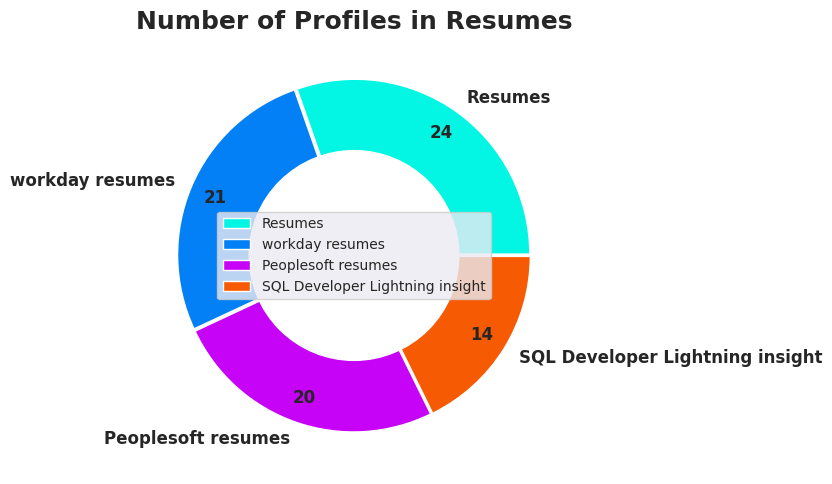

In [38]:
import os

# Before saving the figure, create the directory if it doesn't exist
os.makedirs('IMG', exist_ok=True)

fig = plt.figure(figsize=(8,8))

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03'] #, '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110'

# Adjust the explode tuple to match the number of slices
explode = (0.01,) * len(sizes) # create explode tuple with same len as sizes

plt.pie(sizes, colors= colors, labels= labels, autopct= lambda x:'{:.0f}'.format(x*sizes.sum()/100),
        pctdistance= 0.85, explode= explode, startangle=0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Number of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

# Import pylab
import pylab # Import pylab to use pylab.rcParams.update

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG/No_Resume_Pai', dpi = 500)

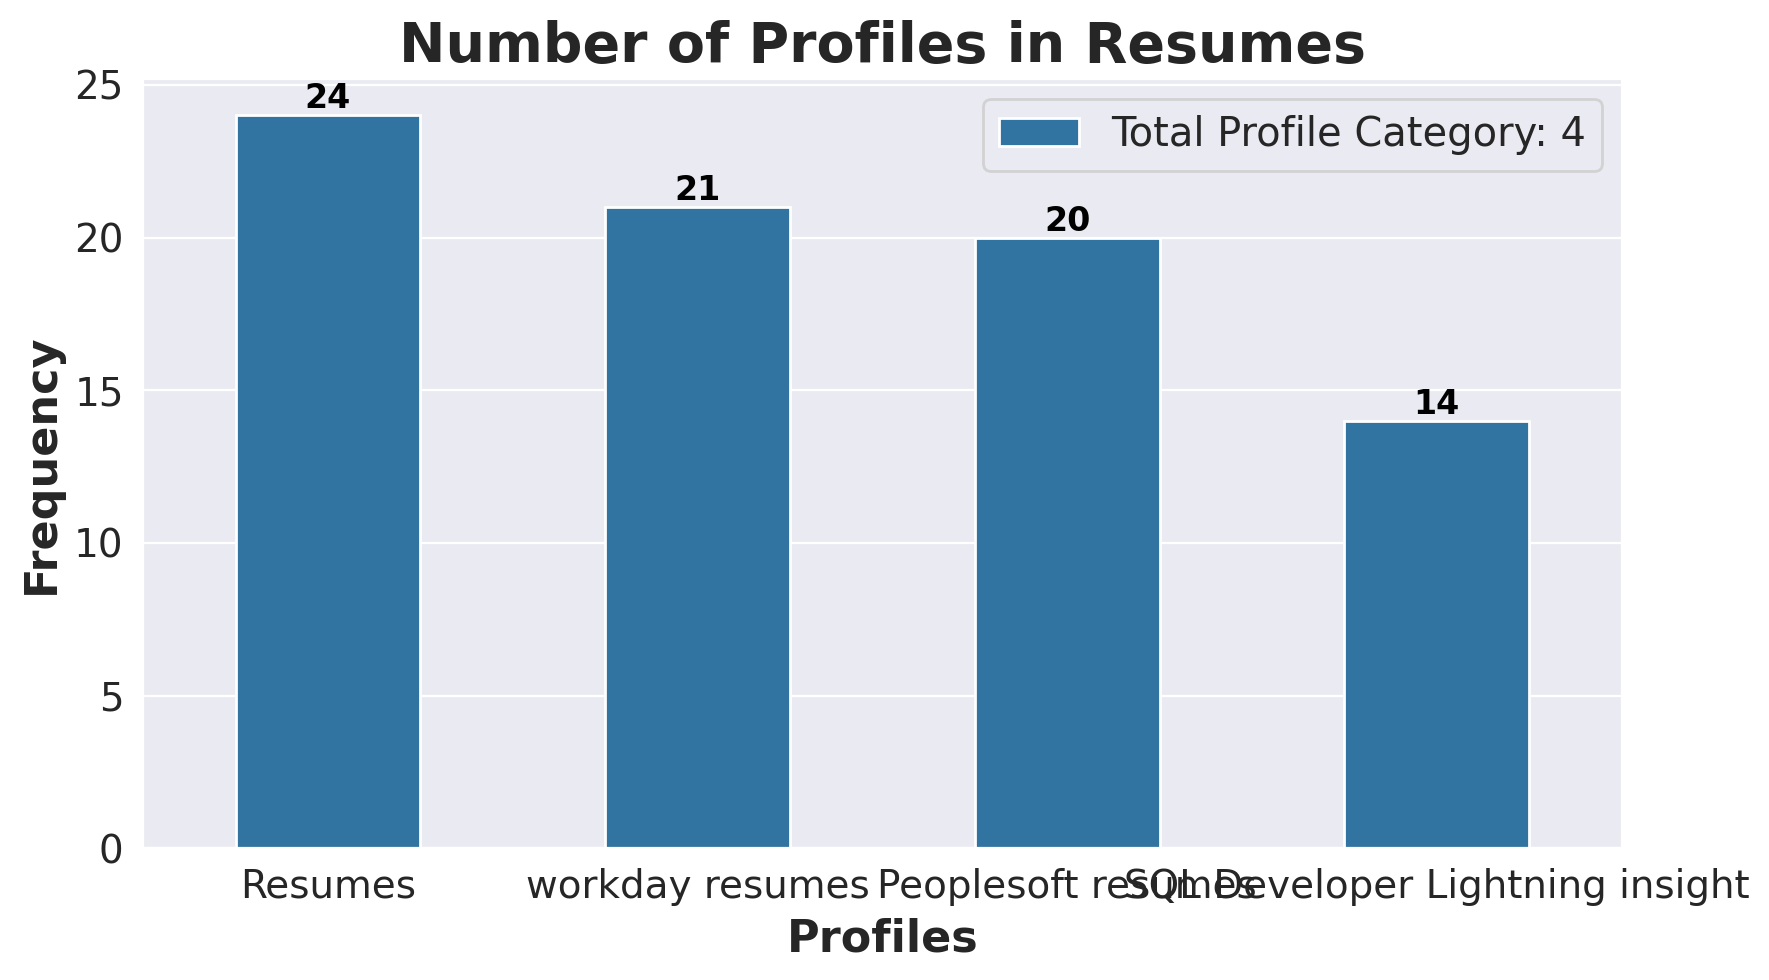

In [39]:
fig, axe = plt.subplots(1,1, figsize=(9,5), dpi=200)

# Remove the 'data=resume_data' argument and instead pass the value counts directly:
ax = sns.barplot(x=resume_data.Profile.value_counts().index,
                 y=resume_data.Profile.value_counts(),
                 width=0.5,
                 ax=axe,
                 label='Total Profile Category: {}'.format(len(resume_data.Profile.unique())))

axe.set_xlabel('Profiles', size=16, fontweight='bold')
axe.set_ylabel('Frequency', size=16, fontweight='bold')
plt.xticks(rotation=0)
plt.legend(loc='best', fontsize='x-large')
plt.title('Number of Profiles in Resumes', fontsize=20, fontweight='bold')

for i in ax.containers:
    ax.bar_label(i, color='black', fontweight='bold', fontsize=12)

import pylab # This line should be at the top of the script
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG/No_Resume_Bar', dpi=500)

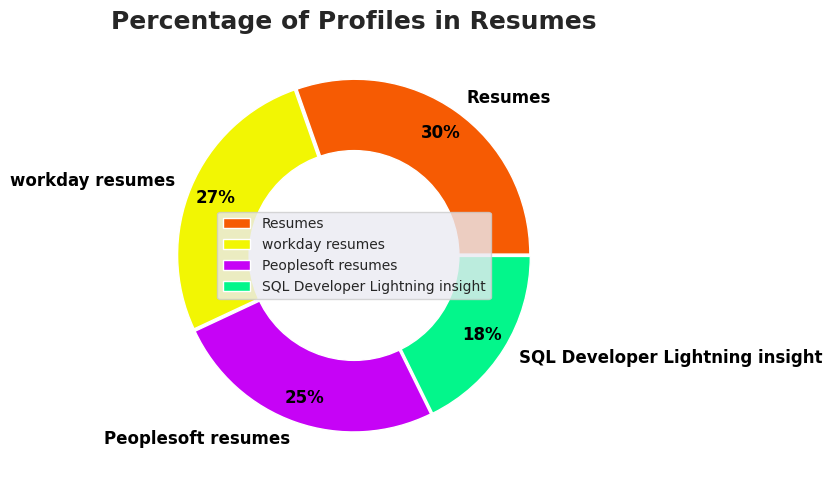

In [40]:
fig = plt.figure(figsize=(8,8),dpi=100)

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#F65B03', '#F2F603', '#C603F6', '#03F68B']
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance=0.85, explode= explode,
        startangle= 0, textprops= {'size':'large', 'fontweight':'bold', 'color':'black'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG/Per_Cat_Pai', dpi = 500)

In [46]:
def extract_text_from_docx(docx_path):
    """
    Extracts text from a docx file.

    Args:
        docx_path (str): The path to the docx file.

    Returns:
        str: The extracted text, or None if the file could not be processed.
    """
    import docx2txt # Import docx2txt inside the function to ensure it's available

    try:
        # Use forward slashes for the file path for better compatibility
        txt = docx2txt.process(docx_path)
        if txt:
            return txt.replace('\t', ' ')
        return None
    except FileNotFoundError:
        print(f"Error: File not found at path: {docx_path}")
        return None

# Install and import docx2txt
!pip install docx2txt
import docx2txt

# Use a raw string (r"path") or forward slashes to avoid issues with backslashes.
# Alternatively, you can use os.path.join to construct the path:
# file_path = os.path.join('Resume_Docx', 'React JS Developer', 'React Developer_Haripriya.docx')
file_path = r'/content/drive/MyDrive/RESUME_CLASSIFICATION/Resumes/React_Dev_Krishna_Kanth.docx'
print(extract_text_from_docx(file_path))

Ui-Developer/ React JS Developer 

NAME: KRISHNA 

PROFESSIONAL SUMMARY:

  Over all 3.2 years of Extensive experience as a React JS/Web- Developer and 1 year of Experience as React JS Software Developer.

  Extensive experience in developing web pages using HTML, XML, CSS, JavaScript, React JS, Redux, JSON.

  Experience in all phase of SDLC like Requirement Analysis, Implementation and Maintenance, and extensive experience with Agile and SCRUM.

  Extensive knowledge in developing single - page applications (SPAs).

  Good Expertise in analyzing the Document Object Model (DOM) Layout, DOM Functions, and Java Script functions, Cascading Styles across cross-browser using Fire Bug, Developer Tool Bar.

  Expertise in React JS framework to develop the SPA.

  Experienced in React JS and working with React Flux architecture.

  Experienced in working with redux architecture using complex Object-Oriented concepts in improving the performance of the websites.

  Experience in using React JS

In [51]:
import pandas as pd
import io
from google.colab import drive
drive.mount('/content/drive')

# Download the file from Google Drive as a string and then read it with pandas.
# Original: resume_data = pd.read_csv(r'https://drive.google.com/file/d/1FO1IVH-GdPZ789Gm0moB3QeBZ3NpDPcJ/view?usp=drive_link')

# Download the file from Google Drive.
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1FO1IVH-GdPZ789Gm0moB3QeBZ3NpDPcJ' -O 'resume_data.csv'

# Load the dataset.
resume_data = pd.read_csv('resume_data.csv')

resume_data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2024-11-15 04:35:57--  https://docs.google.com/uc?export=download&id=1FO1IVH-GdPZ789Gm0moB3QeBZ3NpDPcJ
Resolving docs.google.com (docs.google.com)... 142.250.98.139, 142.250.98.100, 142.250.98.138, ...
Connecting to docs.google.com (docs.google.com)|142.250.98.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1FO1IVH-GdPZ789Gm0moB3QeBZ3NpDPcJ&export=download [following]
--2024-11-15 04:35:57--  https://drive.usercontent.google.com/download?id=1FO1IVH-GdPZ789Gm0moB3QeBZ3NpDPcJ&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.107.132, 2607:f8b0:400c:c32::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.107.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 328074 (3

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh work globally competitive ...
1,PeopleSoft,ananda rayudu profile summary years experience...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal murali experience summ...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,Workday,workday integration consultant name sri krishn...
75,Workday,seeking suitable positions workday hcm techno ...
76,Workday,workday hcm fcm name role kumar workday consul...
77,Workday,venkateswarlu workday consultant professional ...


In [54]:
import nltk

nltk.download('punkt_tab')
nltk.download('punkt') # download punkt as well (as it is also used for tokenization)
nltk.download('averaged_perceptron_tagger') # optional for improved tokenization (Recommended)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [55]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(1)[:20]

[WordList(['ananda']),
 WordList(['rayudu']),
 WordList(['profile']),
 WordList(['summary']),
 WordList(['years']),
 WordList(['experience']),
 WordList(['implementing']),
 WordList(['upgrading']),
 WordList(['supporting']),
 WordList(['peoplesoft']),
 WordList(['database']),
 WordList(['administration']),
 WordList(['including']),
 WordList(['human']),
 WordList(['capital']),
 WordList(['management']),
 WordList(['hcm']),
 WordList(['financials']),
 WordList(['campus']),
 WordList(['solutions'])]

In [56]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(2)[:20]

[WordList(['ananda', 'rayudu']),
 WordList(['rayudu', 'profile']),
 WordList(['profile', 'summary']),
 WordList(['summary', 'years']),
 WordList(['years', 'experience']),
 WordList(['experience', 'implementing']),
 WordList(['implementing', 'upgrading']),
 WordList(['upgrading', 'supporting']),
 WordList(['supporting', 'peoplesoft']),
 WordList(['peoplesoft', 'database']),
 WordList(['database', 'administration']),
 WordList(['administration', 'including']),
 WordList(['including', 'human']),
 WordList(['human', 'capital']),
 WordList(['capital', 'management']),
 WordList(['management', 'hcm']),
 WordList(['hcm', 'financials']),
 WordList(['financials', 'campus']),
 WordList(['campus', 'solutions']),
 WordList(['solutions', 'portal'])]

In [57]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(3)[:20]

[WordList(['ananda', 'rayudu', 'profile']),
 WordList(['rayudu', 'profile', 'summary']),
 WordList(['profile', 'summary', 'years']),
 WordList(['summary', 'years', 'experience']),
 WordList(['years', 'experience', 'implementing']),
 WordList(['experience', 'implementing', 'upgrading']),
 WordList(['implementing', 'upgrading', 'supporting']),
 WordList(['upgrading', 'supporting', 'peoplesoft']),
 WordList(['supporting', 'peoplesoft', 'database']),
 WordList(['peoplesoft', 'database', 'administration']),
 WordList(['database', 'administration', 'including']),
 WordList(['administration', 'including', 'human']),
 WordList(['including', 'human', 'capital']),
 WordList(['human', 'capital', 'management']),
 WordList(['capital', 'management', 'hcm']),
 WordList(['management', 'hcm', 'financials']),
 WordList(['hcm', 'financials', 'campus']),
 WordList(['financials', 'campus', 'solutions']),
 WordList(['campus', 'solutions', 'portal']),
 WordList(['solutions', 'portal', 'ihub'])]

In [58]:
resume_data['Resume_Details']

,Resume_Details
0,anubhav kumar singh work globally competitive ...
1,ananda rayudu profile summary years experience...
2,peoplesoft database administrator gangareddy p...
3,classification internal murali experience summ...
4,priyanka ramadoss mountpleasant coonoor nilgir...
...,...
74,workday integration consultant name sri krishn...
75,seeking suitable positions workday hcm techno ...
76,workday hcm fcm name role kumar workday consul...
77,venkateswarlu workday consultant professional ...


In [60]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Download the 'stopwords' dataset
nltk.download('stopwords')

# Now you can use the stopwords in your CountVectorizer
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(resume_data['Resume_Details']) # matrix of ngrams
count_values = ngrams.toarray().sum(axis=0) # count frequency of ngrams

vocab = countvec.vocabulary_ # list of ngrams
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [61]:
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(resume_data['Resume_Details']) # matrix of ngrams
count_values = ngrams.toarray().sum(axis=0) # count frequency of ngrams

vocab = countvec.vocabulary_ # list of ngrams
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

In [62]:
df_ngram.head(20)

,Frequency,Unigram_Bigram
0,582,experience
1,451,peoplesoft
2,427,workday
3,415,application
4,394,using
5,358,server
6,331,data
7,326,reports
8,323,project
9,280,sql


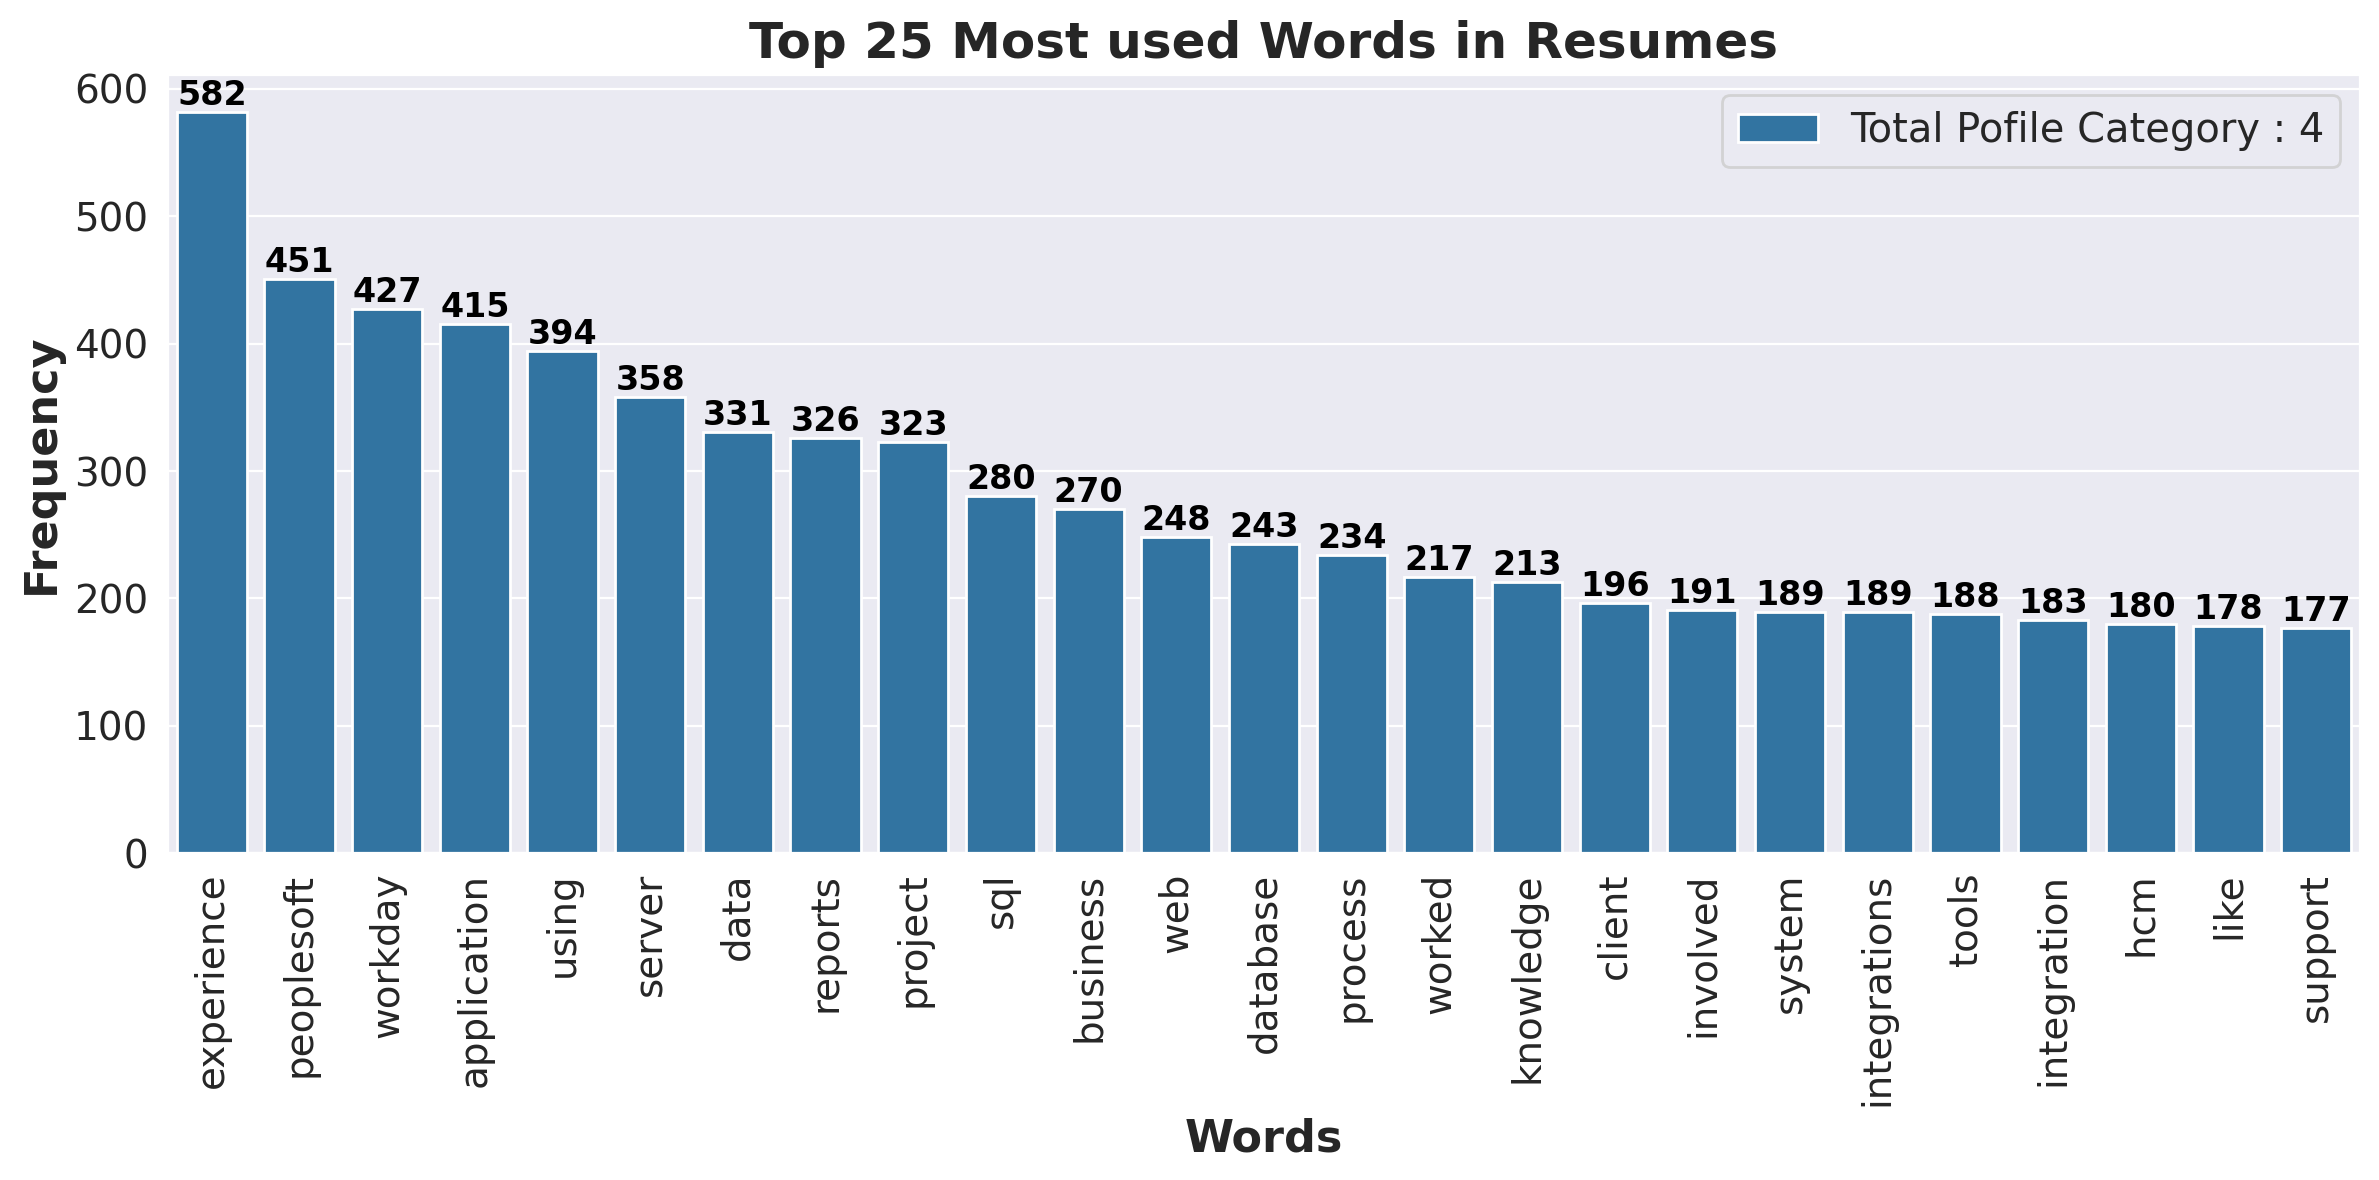

In [63]:
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(25), y=df_ngram.Frequency.head(25), data=resume_data, ax = axe,
            label='Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Words', size=16,fontweight= 'bold')
axe.set_ylabel('Frequency', size=16, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Words in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG/Top_Words_Bar', dpi = 500)

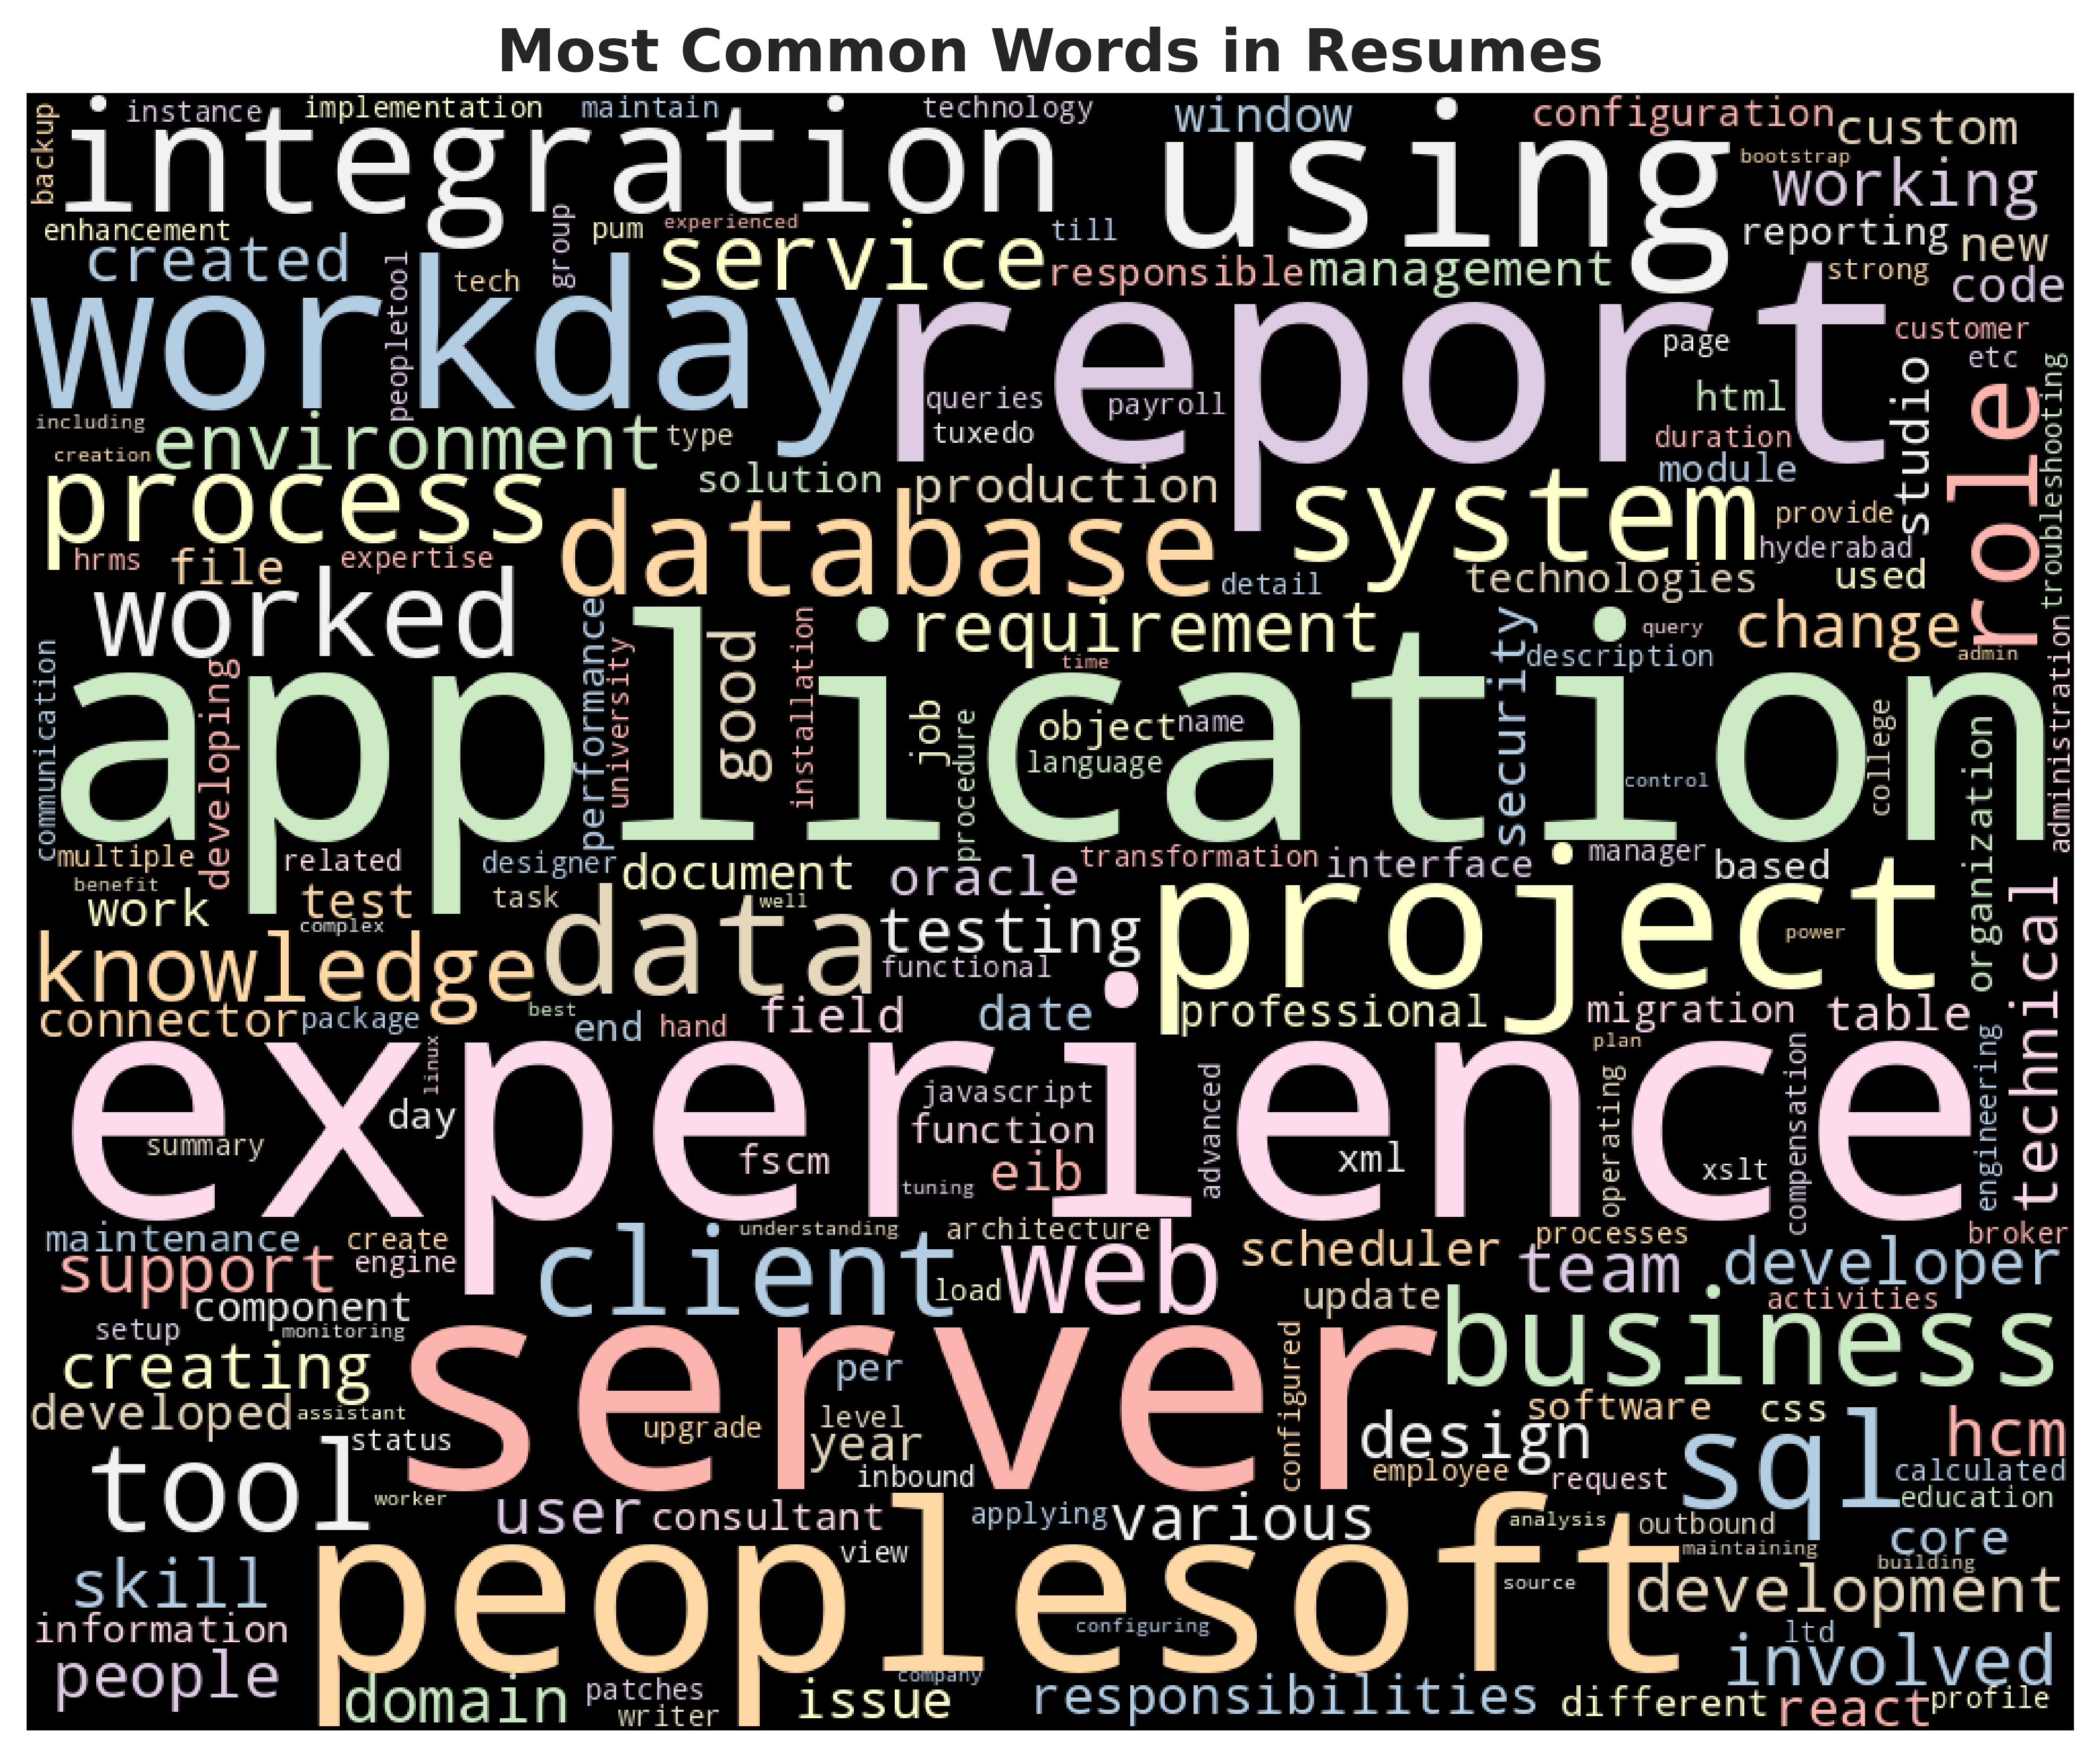

In [64]:
text = " ".join(cat for cat in resume_data.Resume_Details) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

word_cloud.to_file('IMG/Word_Clowds.png')
plt.show()